In [1]:
import streamlit as st
import requests, json
import pandas as pd 
from web3 import Web3
import time 
import numpy as np
import pymongo
from pymongo import MongoClient
from helpers import parse_meebit_data

import re
from bs4 import BeautifulSoup
import datetime
import time
import os
import sys
import matplotlib.pyplot as plt

from collections import defaultdict 
from sklearn.base import BaseEstimator, RegressorMixin, TransformerMixin
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsRegressor

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split

from sklearn.feature_extraction import DictVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer, TfidfTransformer
from sklearn.svm import SVC
from sklearn.compose import ColumnTransformer
from sklearn.utils import shuffle
from sklearn.metrics import fbeta_score, r2_score, make_scorer

from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, train_test_split, cross_val_score, cross_validate
from sklearn.metrics import r2_score
from sklearn.preprocessing import MaxAbsScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn import svm 
from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD
from sklearn.ensemble import RandomForestRegressor

###REGRESSORS
from sklearn.linear_model import Ridge
import lightgbm as lgb
import xgboost as xgb
from catboost import CatBoostRegressor

In [24]:
###### import kitties

url = "https://kittyhelper.co/api/search/?include=sale%2Csire%2Cother&search=gen%3A0&orderBy=current_price&orderDirection=asc"
#url = "https://kittyhelper.co/api/search/?include=sale%2Csire%2Cother&search=gen%3A0&orderDirection=desc&offset=0&limit=36258"


data = {'kitties':[]}

        
#for i in range(0, 100):


for i in range(0, 36259) :   
    querystring = {"offset":i,
                   "limit":"1"}

    headers = {"Accept": "application/json"}

    response = requests.request("GET", url, headers=headers, params=querystring)

    #print(i, response.status_code)
    #print(response.status_code)
    if response.status_code != 200:
        print('error')
    
    #Getting meebits sales data
    #print(response.json()['kitties'])

    #time.sleep(1)
    
    
    data['kitties'].extend(response.json()['kitties'])
    
with open('g0_kitties_api.json', 'w') as outfile:
    json.dump(data, outfile)
    print('dumped')


dumped


In [1320]:
with open('../g0_kitties_api.json') as f:
    data_ck = json.loads(f.read())
    df_ck_all = pd.DataFrame(data_ck['kitties'])

df_ck_all = df_ck_all.drop_duplicates(subset='id', keep="first")


#df_ck_all = df_ck_all.drop('image_url', 1)
df_ck_all = df_ck_all.drop('image_url_cdn', 1)
#df_ck_all = df_ck_all.drop('image_path', 1)
df_ck_all = df_ck_all.drop('kitty_items_image_path', 1)
df_ck_all = df_ck_all.drop('owner', 1)

df_ck_all  = pd.concat([df_ck_all.drop(['status'], axis=1), df_ck_all['status'].apply(pd.Series)], axis=1)
df_ck_all  = pd.concat([df_ck_all.drop(['auction'], axis=1), df_ck_all['auction'].apply(pd.Series)], axis=1)
#df_ck_all  = pd.concat([df_ck_all.drop(['owner'], axis=1), df_ck_all['owner'].apply(pd.Series)], axis=1)
df_ck_all  = pd.concat([df_ck_all.drop(['purrs'], axis=1), df_ck_all['purrs'].apply(pd.Series)], axis=1)
df_ck_all  = df_ck_all.rename({'count': 'purred_count'}, axis=1) 
df_ck_all  = df_ck_all.rename({'id': 'ID_token'}, axis=1) 

#df_ck_all  = pd.concat([df_ck_all.drop(['enhanced_cattributes'], axis=1), df_ck_all['enhanced_cattributes'].apply(pd.Series)], axis=1)

#df_ck_all  = pd.concat([df_ck_all.drop([1], axis=1), df_ck_all[1].apply(pd.Series)], axis=1)

print(df_ck_all.columns)


df_ck_all.head()


/var/folders/vh/k7krxtl53wz_vryc3nf_zvw40000gn/T/ipykernel_8370/2745725266.py:9: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df_ck_all = df_ck_all.drop('image_url_cdn', 1)
/var/folders/vh/k7krxtl53wz_vryc3nf_zvw40000gn/T/ipykernel_8370/2745725266.py:11: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df_ck_all = df_ck_all.drop('kitty_items_image_path', 1)
/var/folders/vh/k7krxtl53wz_vryc3nf_zvw40000gn/T/ipykernel_8370/2745725266.py:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df_ck_all = df_ck_all.drop('owner', 1)


Index(['ID_token', 'image_url', 'image_url_png', 'image_path', 'generation',
       'created_at', 'color', 'kitty_type', 'is_fancy', 'is_exclusive',
       'is_special_edition', 'language', 'enhanced_cattributes', 'is_prestige',
       'prestige_type', 'prestige_ranking', 'cooldown_index',
       'cooldown_end_block', 'is_gestating', 'is_ready', 'dynamic_cooldown',
       'cooldown', 'type', 'start_price', 'end_price', 'current_price',
       'start_time', 'end_time', 'duration', 'seller', 'purred_count',
       'is_purred'],
      dtype='object')


,ID_token,image_url,image_url_png,image_path,generation,created_at,color,kitty_type,is_fancy,is_exclusive,...,type,start_price,end_price,current_price,start_time,end_time,duration,seller,purred_count,is_purred
0,848437,https://img.cryptokitties.co/0x06012c8cf97bead...,https://img.cryptokitties.co/0x06012c8cf97bead...,/0x06012c8cf97bead5deae237070f9587f8e7a266d/.svg,0,2018-07-17T16:57:55.000Z,parakeet,None,False,False,...,sire,50000000000000000,0,0,1618315669000,1618747669000,432000000,{'address': '0xBb1e390b77Ff99f2765e78EF1A7d069...,14,True
1,848439,https://img.cryptokitties.co/0x06012c8cf97bead...,https://img.cryptokitties.co/0x06012c8cf97bead...,/0x06012c8cf97bead5deae237070f9587f8e7a266d/.svg,0,2018-07-17T16:58:56.000Z,cyan,None,False,False,...,sire,50000000000000000,0,0,1619296295000,1619728295000,432000000,{'address': '0xBb1e390b77Ff99f2765e78EF1A7d069...,13,True
2,848440,https://img.cryptokitties.co/0x06012c8cf97bead...,https://img.cryptokitties.co/0x06012c8cf97bead...,/0x06012c8cf97bead5deae237070f9587f8e7a266d/.svg,0,2018-07-17T16:59:24.000Z,parakeet,None,False,False,...,sire,50000000000000000,0,0,1619739792000,1620171792000,432000000,{'address': '0xBb1e390b77Ff99f2765e78EF1A7d069...,14,True
3,848441,https://img.cryptokitties.co/0x06012c8cf97bead...,https://img.cryptokitties.co/0x06012c8cf97bead...,/0x06012c8cf97bead5deae237070f9587f8e7a266d/.svg,0,2018-07-17T17:00:01.000Z,thundergrey,None,False,False,...,sire,50000000000000000,0,0,1619957734000,1620389734000,432000000,{'address': '0xBb1e390b77Ff99f2765e78EF1A7d069...,12,True
4,848442,https://img.cryptokitties.co/0x06012c8cf97bead...,https://img.cryptokitties.co/0x06012c8cf97bead...,/0x06012c8cf97bead5deae237070f9587f8e7a266d/.svg,0,2018-07-17T17:01:03.000Z,dahlia,None,False,False,...,sire,50000000000000000,0,0,1622875246000,1623307246000,432000000,{'address': '0xBb1e390b77Ff99f2765e78EF1A7d069...,17,True


In [1329]:
df_ck_all.iloc[6] #.sort_values(['image_url_png'])

ID_token                                                           876513
image_url               https://img.cryptokitties.co/0x06012c8cf97bead...
image_url_png           https://img.cryptokitties.co/0x06012c8cf97bead...
image_path               /0x06012c8cf97bead5deae237070f9587f8e7a266d/.svg
generation                                                              0
created_at                                       2018-08-08T17:27:36.000Z
color                                                              dahlia
kitty_type                                                           None
is_fancy                                                            False
is_exclusive                                                        False
is_special_edition                                                  False
language                                                               en
enhanced_cattributes    [{'type': 'colorprimary', 'kittyId': '876513',...
is_prestige                           

In [13]:
"""print(df_ck_all["id"][0])
print(df_ck_all["created_at"][0])
print(df_ck_all["image_url_png"][0])

print(df_ck_all["prestige_ranking"][0])
print(df_ck_all["prestige_type"][0])
print(df_ck_all["is_special_edition"][0])
print(df_ck_all["is_exclusive"][0])
print(df_ck_all["is_fancy"][0])
print(df_ck_all["color"][0])


#print(df_ck_all["enhanced_cattributes"][0])
print(df_ck_all["enhanced_cattributes"][0][0]['type'])     
print(df_ck_all["enhanced_cattributes"][0][0]['description'])

print(df_ck_all["enhanced_cattributes"][0][1]['type'])     
print(df_ck_all["enhanced_cattributes"][0][1]['description'])

print(df_ck_all["enhanced_cattributes"][0][2]['type'])     
print(df_ck_all["enhanced_cattributes"][0][2]['description'])

print(df_ck_all["enhanced_cattributes"][0][3]['type'])     
print(df_ck_all["enhanced_cattributes"][0][3]['description'])

print(df_ck_all["enhanced_cattributes"][0][4]['type'])     
print(df_ck_all["enhanced_cattributes"][0][4]['description'])

print(df_ck_all["enhanced_cattributes"][0][5]['type'])     
print(df_ck_all["enhanced_cattributes"][0][5]['description'])

print(df_ck_all["enhanced_cattributes"][0][6]['type'])     
print(df_ck_all["enhanced_cattributes"][0][6]['description'])


#print(df_ck_all["status"][0])
print(df_ck_all["status"][0]['cooldown_index'])
print(df_ck_all["status"][0]['is_gestating'])
print(df_ck_all["status"][0]['is_ready'])

#print(df_ck_all["purrs"][0])
print(df_ck_all["purrs"][0]['count'])
print(df_ck_all["purrs"][0]['is_purred'])

print(df_ck_all["owner"][0])
print(df_ck_all["auction"][0])
print(df_ck_all["auction"][0]['type'])
print(df_ck_all["auction"][0]['current_price'])
print(df_ck_all["auction"][0]['start_price'])
print(df_ck_all["auction"][0]['end_price'])"""

'print(df_ck_all["id"][0])\nprint(df_ck_all["created_at"][0])\nprint(df_ck_all["image_url_png"][0])\n\nprint(df_ck_all["prestige_ranking"][0])\nprint(df_ck_all["prestige_type"][0])\nprint(df_ck_all["is_special_edition"][0])\nprint(df_ck_all["is_exclusive"][0])\nprint(df_ck_all["is_fancy"][0])\nprint(df_ck_all["color"][0])\n\n\n#print(df_ck_all["enhanced_cattributes"][0])\nprint(df_ck_all["enhanced_cattributes"][0][0][\'type\'])     \nprint(df_ck_all["enhanced_cattributes"][0][0][\'description\'])\n\nprint(df_ck_all["enhanced_cattributes"][0][1][\'type\'])     \nprint(df_ck_all["enhanced_cattributes"][0][1][\'description\'])\n\nprint(df_ck_all["enhanced_cattributes"][0][2][\'type\'])     \nprint(df_ck_all["enhanced_cattributes"][0][2][\'description\'])\n\nprint(df_ck_all["enhanced_cattributes"][0][3][\'type\'])     \nprint(df_ck_all["enhanced_cattributes"][0][3][\'description\'])\n\nprint(df_ck_all["enhanced_cattributes"][0][4][\'type\'])     \nprint(df_ck_all["enhanced_cattributes"][0]

In [14]:


traits = defaultdict(lambda: defaultdict(dict))

asset_rarities=[]
with open('cryptokitties_assets_g0.json') as f:
    data_all = json.loads(f.read())
    df_crypto_all = pd.DataFrame(data_all['assets'])
    
    ### rarities
    for ind, asset in enumerate(data_all['assets']):
        asset_rarity = 1
        #print(asset['ID_token'])
        traits[ind]['ID_token'] = asset['ID_token']
        traits[ind]['Smart_contract'] = asset['Smart_contract']
        traits[ind]['num_sales'] = asset['num_sales']
        traits[ind]['total_price'] = asset['total_price']
        for trait in asset['traits']:
            traits[ind][trait['trait_type'] + '_value'] = trait['value']
            traits[ind][trait['trait_type'] + '_count'] = trait['trait_count']

df_traits = pd.DataFrame.from_dict(traits, orient='index')
df_traits = df_traits.drop_duplicates(subset='ID_token', keep="first")
df_crypto_all = df_crypto_all.drop_duplicates(subset='ID_token', keep="first")

len(df_crypto_all)

31766

In [10]:
#print(len(df_crypto_all))
#print(len(df_traits))
df_traits.head()
#df_crypto_all['created'].unique()

array(['2018-01-23T04:51:38.832339'], dtype=object)

### RARITY COUNTS PER TRAIT AND GENERATION


In [15]:
options = {'PU':1, 'Secret':2, 'Environment': 3, 'Mouth':4, 'Wild':5,
          'Accent_Colour':6, 'Highlight_Colour': 7, 'Base_Colour': 8, 'Eye_Shape': 9,
          'Eye_Colour':10, 'Pattern': 11, 'Fur':12}

alltraits = []

for key, value in options.items():
    url = "https://kittyhelper.co/tools/traits-rarity/?type=" + str(value)
    page = requests.get(url) #params={"search_api_views_fulltext": ""}
    soup = BeautifulSoup(page.text) 
    
    tr_elements = soup.find_all('table')[0].find_all('tr')
    for tr in tr_elements[1:-1]:
        #print(tr)
        td_elements = tr.find_all('td')

        thisone = [value]
        #trait
        xx = str(td_elements[1]).strip('<td>').strip('</')
        trait = re.findall(r"\>(.*?)\<",xx)
        thisone.append(trait[0].lower())
    
        #genvals = [] 
        for gen in range(2,7):
            xx = str(td_elements[gen]).strip('<td>').strip('</')
            thisone.append(xx)
        
        alltraits.extend([thisone]) 
        
df_cattributes = pd.DataFrame(alltraits, columns=['category', 'cattribute', 'gen0', 'gen1', 'gen2', 'gen3', 'gen4'])
df_cattributes

,category,cattribute,gen0,gen1,gen2,gen3,gen4
0,1,pu00,1,1481,1544,1554,1496
1,1,pu01,674,2546,1901,1523,1364
2,1,pu02,790,3202,2266,1846,1542
3,1,pu03,0,88,330,246,330
4,1,pu04,0,919,1456,1406,1609
...,...,...,...,...,...,...,...
367,12,toyger,0,0,84,552,344
368,12,manx,1,0,312,1015,827
369,12,lykoi,0,0,0,154,704
370,12,burmilla,0,0,0,107,707


## get generations 0-4

In [1380]:

#features = df_traits.loc[df_traits['generation_value'].isin([0, 1, 2, 3, 4])]
df_traits['cooldown_timer_value'].

0        Catatonic (1 week)
1        Catatonic (1 week)
2        Catatonic (1 week)
3        Catatonic (1 week)
4        Catatonic (1 week)
                ...        
32075                   NaN
32076                   NaN
32077                   NaN
32078                   NaN
32079                   NaN
Name: cooldown_timer_value, Length: 31766, dtype: object

#### calculate rarity

In [1290]:
rarities = defaultdict(lambda: defaultdict(dict))

calc_rarities=[]

allkitties = 38015

for ind, row in df_traits.iterrows():

    strgen = "gen0"

    rarities[ind]['ID_token'] = row['ID_token']
    rarities[ind]['Smart_contract'] = row['Smart_contract']

    #PU_1
    x = df_cattributes[df_cattributes["cattribute"] == row['purrstige_value']].index.values
    if df_cattributes[df_cattributes["cattribute"] == row['purrstige_value']].index.values:   
        if int(df_cattributes[strgen][x]) == 0:
            rarities[ind]['PU_rarity']  = 0
        else:    
            #rarities[ind]['PU_rarity']  = row['purrstige_count'] / int(df_cattributes[strgen][x])
            rarities[ind]['PU_rarity']  =  int(df_cattributes[strgen][x])/allkitties 
            
    else: 
        rarities[ind]['PU_rarity']  = 0
     
    #secret_2
    x = df_cattributes[df_cattributes["cattribute"]==row['secret_value']].index.values
    if df_cattributes[df_cattributes["cattribute"]==row['secret_value']].index.values: 
        if int(df_cattributes[strgen][x]) == 0:
            rarities[ind]['secret_rarity']  = 0
        else:     
            #rarities[ind]['secret_rarity']  = row['secret_count'] / int(df_cattributes[strgen][x])
            rarities[ind]['secret_rarity']  =int(df_cattributes[strgen][x])/allkitties 
    else: 
        rarities[ind]['secret_rarity']  = 0
        

        
    #mouth_4
    x = df_cattributes[df_cattributes["cattribute"]==row['mouth_value']].index.values
    if df_cattributes[df_cattributes["cattribute"]==row['mouth_value']].index.values: 
        if int(df_cattributes[strgen][x]) == 0:
            rarities[ind]['mouth_rarity']  = 0
        else:          
            #rarities[ind]['mouth_rarity']  = row['mouth_count'] / int(df_cattributes[strgen][x])
            rarities[ind]['mouth_rarity']  = int(df_cattributes[strgen][x])/allkitties 

    else: 
        rarities[ind]['mouth_rarity']  = 0
        

    #accent_color_6
    x = df_cattributes[df_cattributes["cattribute"]==row['accent_colour_value']].index.values
    if df_cattributes[df_cattributes["cattribute"]==row['accent_colour_value']].index.values:   
        if int(df_cattributes[strgen][x]) == 0:
            rarities[ind]['accent_colour_rarity']  = 0
        else:          
            #rarities[ind]['accent_colour_rarity']  = row['accent_colour_count'] / int(df_cattributes[strgen][x])
            rarities[ind]['accent_colour_rarity']  = int(df_cattributes[strgen][x])/allkitties 
            

    else: 
        rarities[ind]['accent_colour_rarity']  = 0
        
    #highlight_color_7
    x = df_cattributes[df_cattributes["cattribute"]==row['highlight_colour_value']].index.values
    if df_cattributes[df_cattributes["cattribute"]==row['highlight_colour_value']].index.values: 
        if int(df_cattributes[strgen][x]) == 0:
            rarities[ind]['highlight_colour_rarity']  = 0
        else:        
            #rarities[ind]['highlight_colour_rarity']  = row['highlight_colour_count'] / int(df_cattributes[strgen][x])
            rarities[ind]['highlight_colour_rarity']  = int(df_cattributes[strgen][x])/allkitties 
    else: 
        rarities[ind]['highlight_colour_rarity']  = 0
        
    #base_color_8
    x = df_cattributes[df_cattributes["cattribute"]==row['base_colour_value']].index.values
    if df_cattributes[df_cattributes["cattribute"]==row['base_colour_value']].index.values:   
        if int(df_cattributes[strgen][x]) == 0:
            rarities[ind]['base_colour_rarity']  = 0
        else:        
            #rarities[ind]['base_colour_rarity']  = row['base_colour_count'] / int(df_cattributes[strgen][x])
            rarities[ind]['base_colour_rarity']  =  int(df_cattributes[strgen][x])/allkitties 
    else: 
        rarities[ind]['base_colour_rarity']  = 0
        
    #eye_shape_9
    x = df_cattributes[df_cattributes["cattribute"]==row['eye_shape_value']].index.values
    if df_cattributes[df_cattributes["cattribute"]==row['eye_shape_value']].index.values:  
        if int(df_cattributes[strgen][x]) == 0:
            rarities[ind]['eye_shape_rarity']  = 0
        else:
            #rarities[ind]['eye_shape_rarity']  = row['eye_shape_count'] / int(df_cattributes[strgen][x])
            rarities[ind]['eye_shape_rarity']  =int(df_cattributes[strgen][x])/allkitties 
    else: 
        rarities[ind]['eye_shape_rarity']  = 0
        
    #eye_color_10
    x = df_cattributes[df_cattributes["cattribute"]==row['eye_colour_value']].index.values
    if df_cattributes[df_cattributes["cattribute"]==row['eye_colour_value']].index.values:  
        if int(df_cattributes[strgen][x]) == 0:
            rarities[ind]['eye_colour_rarity']  = 0
        else:         
            #rarities[ind]['eye_colour_rarity']  = row['eye_colour_count'] / int(df_cattributes[strgen][x])
            rarities[ind]['eye_colour_rarity']  =int(df_cattributes[strgen][x])/allkitties 
    else: 
        rarities[ind]['eye_colour_rarity']  = 0
        
    #pattern_11
    x = df_cattributes[df_cattributes["cattribute"]==row['pattern_value']].index.values
    if df_cattributes[df_cattributes["cattribute"]==row['pattern_value']].index.values: 
        if int(df_cattributes[strgen][x]) == 0:
            rarities[ind]['pattern_rarity']  = 0
        else:
            #rarities[ind]['pattern_rarity']  = row['pattern_count'] / int(df_cattributes[strgen][x])
            rarities[ind]['pattern_rarity']  = int(df_cattributes[strgen][x])/allkitties 
    else: 
        rarities[ind]['pattern_rarity']  = 0
        
    #fur_12
    x = df_cattributes[df_cattributes["cattribute"]==row['fur_value']].index.values
    if df_cattributes[df_cattributes["cattribute"]==row['fur_value']].index.values:   
        if int(df_cattributes[strgen][x]) == 0:
            rarities[ind]['fur_rarity']  = 0
        else:          
            #rarities[ind]['fur_rarity']  = row['fur_count'] / int(df_cattributes[strgen][x])
            rarities[ind]['fur_rarity']  =  int(df_cattributes[strgen][x])/allkitties 
    else: 
        rarities[ind]['fur_rarity']  = 0
        
        
    masked_pu= rarities[ind]['PU_rarity']
    if rarities[ind]['PU_rarity'] == 0:
        masked_pu_s = 0
        masked_pu_m = 1
        
    masked_mouth = rarities[ind]['mouth_rarity']
    if rarities[ind]['mouth_rarity'] == 0:
        masked_mouth_s = 0
        masked_mouth_m = 1
        
    masked_secret = rarities[ind]['secret_rarity']
    if rarities[ind]['secret_rarity'] == 0:
        masked_secret_s = 0
        masked_secret_m = 1

    masked_accent_colour = rarities[ind]['accent_colour_rarity']
    if rarities[ind]['accent_colour_rarity'] == 0:
        masked_accent_colour_s = 0
        masked_accent_colour_m = 1
        
    masked_highlight_colour = rarities[ind]['highlight_colour_rarity']
    if rarities[ind]['highlight_colour_rarity'] == 0:
        masked_highlight_colour_s = 0
        masked_highlight_colour_m = 1
        
    masked_base_colour = rarities[ind]['base_colour_rarity']
    if rarities[ind]['base_colour_rarity'] == 0:
        masked_base_colour_s = 0
        masked_base_colour_m = 1
        
    masked_eye_shape = rarities[ind]['eye_shape_rarity']
    if rarities[ind]['eye_shape_rarity'] == 0:
        masked_eye_shape_s = 0
        masked_eye_shape_m = 1
        
    masked_eye_colour = rarities[ind]['eye_colour_rarity']
    if rarities[ind]['eye_colour_rarity'] == 0:
        masked_eye_colour_s = 0
        masked_eye_colour_m = 1
        
    masked_pattern = rarities[ind]['pattern_rarity']
    if rarities[ind]['pattern_rarity'] == 0:
        masked_pattern_s = 0
        masked_pattern_m = 1
        
    masked_fur = rarities[ind]['fur_rarity']
    if rarities[ind]['fur_rarity'] == 0:
        masked_fur_s = 0
        masked_fur_m = 1
        
        
    rarities[ind]['overall_rarity_mult'] = (1/1)*masked_pu * masked_secret  * masked_mouth * masked_accent_colour * masked_highlight_colour * masked_base_colour * masked_eye_shape * masked_eye_colour * masked_pattern * masked_fur
    rarities[ind]['overall_rarity_sum'] = (0+masked_pu + masked_secret  + masked_mouth  + masked_accent_colour + masked_highlight_colour + masked_base_colour + masked_eye_shape + masked_eye_colour + masked_pattern + masked_fur)


df_rarities = pd.DataFrame.from_dict(rarities, orient='index')
df_rarities = df_rarities.drop_duplicates(subset='ID_token', keep="first")

/var/folders/vh/k7krxtl53wz_vryc3nf_zvw40000gn/T/ipykernel_8370/2302467669.py:16: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if df_cattributes[df_cattributes["cattribute"] == row['purrstige_value']].index.values:
/var/folders/vh/k7krxtl53wz_vryc3nf_zvw40000gn/T/ipykernel_8370/2302467669.py:28: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if df_cattributes[df_cattributes["cattribute"]==row['secret_value']].index.values:
/var/folders/vh/k7krxtl53wz_vryc3nf_zvw40000gn/T/ipykernel_8370/2302467669.py:54: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if df_cattribute

In [1381]:
df_merged_traitrare.columns

Index(['ID_token', 'Smart_contract', 'num_sales', 'total_price',
       'eye_shape_value', 'eye_shape_count', 'highlight_colour_value',
       'highlight_colour_count', 'fur_value', 'fur_count',
       'accent_colour_value', 'accent_colour_count', 'cooldown_timer_value',
       'cooldown_timer_count', 'base_colour_value', 'base_colour_count',
       'eye_colour_value', 'eye_colour_count', 'virginity_value',
       'virginity_count', 'pattern_value', 'pattern_count', 'generation_value',
       'generation_count', 'mouth_value', 'mouth_count', 'secret_value',
       'secret_count', 'purrstige_value', 'purrstige_count', 'eyes_value',
       'eyes_count', 'body_value', 'body_count', 'colorprimary_value',
       'colorprimary_count', 'coloreyes_value', 'coloreyes_count',
       'colortertiary_value', 'colortertiary_count', 'colorsecondary_value',
       'colorsecondary_count', 'cooldown_index_value', 'cooldown_index_count',
       'fanciness_value', 'fanciness_count', 'exclusivity_value',
 

In [1292]:
df_merged_traitrare1 = pd.merge(df_traits, df_rarities, on=['ID_token', 'Smart_contract'], how='left')
df_merged_traitrare =pd.merge(df_merged_traitrare1, df_ck_all, on=['ID_token'], how='left')

#df_merged_traitrare = df_ck_all


df_merged_traitrare=df_merged_traitrare.replace(np.nan, '0')

#df_merged_traitrare['created_at'] =  pd.to_datetime(df_merged_traitrare['created_at'], format='%Y-%m-%d')
df_merged_traitrare['total_price'] = df_merged_traitrare['total_price'].astype('float')
df_merged_traitrare['current_price'] = df_merged_traitrare['current_price'].astype('float')
df_merged_traitrare['start_price'] = df_merged_traitrare['start_price'].astype('float')
df_merged_traitrare['end_price'] = df_merged_traitrare['end_price'].astype('float')
df_merged_traitrare['purred_count'] = df_merged_traitrare['purred_count'].astype('int')
df_merged_traitrare['cooldown_index'] = df_merged_traitrare['cooldown_index'].astype('int')

df_merged_traitrare['is_fancy']  = df_merged_traitrare['is_fancy'] .astype(int)
df_merged_traitrare['is_exclusive']  = df_merged_traitrare['is_exclusive'] .astype(int)
df_merged_traitrare['is_purred']  = df_merged_traitrare['is_purred'] .astype(int)
df_merged_traitrare['ID_token']  = df_merged_traitrare['ID_token'] .astype(float)
      
    
    
for ind, price in enumerate(df_merged_traitrare['total_price']):
    if df_merged_traitrare['total_price'][ind] >1:
        df_merged_traitrare['total_price'][ind] = float(price)/10**18 *4727.01
    else:
        df_merged_traitrare['total_price'][ind] = 0.0



for ind, price in enumerate(df_merged_traitrare['current_price']):
    if df_merged_traitrare['current_price'][ind] >=1:
        df_merged_traitrare['current_price'][ind] = float(price)/10**18 *4727.01
    else:
        df_merged_traitrare['current_price'][ind] = 0.0


df_merged_traitrare = df_merged_traitrare.sort_values(by='total_price', ascending=False)
df_merged_traitrare = df_merged_traitrare.reset_index(drop=True)


df_merged_traitrare = df_merged_traitrare.loc[(df_merged_traitrare['total_price']<=np.exp(8.8665)) | (df_merged_traitrare['total_price']> np.exp(8.8675))]
df_merged_traitrare = df_merged_traitrare.loc[(df_merged_traitrare['total_price']<=np.exp(8.461)) | (df_merged_traitrare['total_price']> np.exp(8.4615))]
        
indexNames1 = df_merged_traitrare[(df_merged_traitrare['total_price'] < np.exp(5))].index
df_merged_traitrare = df_merged_traitrare.drop(indexNames1)

indexNames1 = df_merged_traitrare[(df_merged_traitrare['total_price'] > np.exp(12))].index
df_merged_traitrare = df_merged_traitrare.drop(indexNames1)

df_merged_traitrare = df_merged_traitrare.loc[df_merged_traitrare['generation_value'] == 0]

indexNames = df_merged_traitrare[(df_merged_traitrare['overall_rarity_sum']  == 0)].index
df_merged_traitrare = df_merged_traitrare.drop(indexNames)


#indexNames1 = df_merged_traitrare[(df_merged_traitrare['overall_rarity_sum'] > 1000.0)].index
#df_merged_traitrare = df_merged_traitrare.drop(indexNames1)


df_merged_traitrare['year'] = pd.DatetimeIndex(pd.to_datetime(df_merged_traitrare['created_at'])).year
df_merged_traitrare['month'] = pd.DatetimeIndex(pd.to_datetime(df_merged_traitrare['created_at'])).month

#df_merged_traitrare =df_merged_traitrare.drop(df_merged_traitrare.tail(240).index)

print(len(df_merged_traitrare))


/var/folders/vh/k7krxtl53wz_vryc3nf_zvw40000gn/T/ipykernel_8370/1043534447.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_merged_traitrare['total_price'][ind] = 0.0
/var/folders/vh/k7krxtl53wz_vryc3nf_zvw40000gn/T/ipykernel_8370/1043534447.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_merged_traitrare['total_price'][ind] = float(price)/10**18 *4727.01
/var/folders/vh/k7krxtl53wz_vryc3nf_zvw40000gn/T/ipykernel_8370/1043534447.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/sta

30251


In [1171]:
df_merged_traitrare['year'] = pd.DatetimeIndex(pd.to_datetime(df_merged_traitrare['created_at'])).year
df_merged_traitrare['month'] = pd.DatetimeIndex(pd.to_datetime(df_merged_traitrare['created_at'])).month

df_merged_traitrare['month'].unique()

array([11, 12,  1,  4,  2,  7,  5,  3,  6, 10,  9,  8])

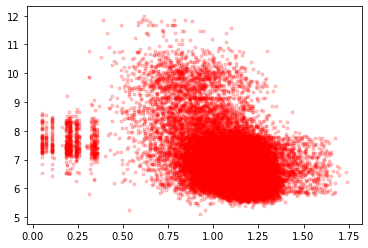

In [1293]:
#plt.plot((df_merged_traitrare['overall_rarity_sum']), np.log1p((df_merged_traitrare['total_price'])),  '.r', alpha=.2)
plt.plot((df_merged_traitrare['overall_rarity_sum']), np.log1p((df_merged_traitrare['total_price'])),  '.r', alpha=.2)

#plt.plot((df_merged_traitrare['overall_rarity_sum']), np.log1p((df_merged_traitrare['current_price'])),  '.r', alpha=.2)
#plt.plot((df_merged_traitrare['overall_rarity_sum']), np.log1p((df_merged_traitrare['end_price'])),  '.r', alpha=.2)

#x=np.linspace(200,800,10)
#plt.plot(x, x/140+10.5 ,  '.b', alpha=.2)


#plt.xlim([0, 1000000])
#plt.ylim([8.461, 8.4615])
plt.show()


###  MACHINE LEARNING

to do:    True/False, 1-0, numerical.. single column
lasso.. 
poly..
most important factors..
website.. 

In [1401]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(strategy="most_frequent")


opts = [ 'ID_token',  'overall_rarity_sum']

#'colortertiary_count', 'colorsecondary_count', 'colorprimary_count', 'base_colour_count', 
"""'mouth_rarity', 'accent_colour_rarity','eye_shape_rarity',
         'fur_rarity', 'eye_colour_rarity', 'PU_rarity','pattern_rarity', 
    'highlight_colour_rarity', 'base_colour_rarity','secret_rarity', """

#opts = ['ID_token']
categorical = [ 'virginity_value', 'cooldown_timer_value', 'eye_shape_value', 'highlight_colour_value',
       'fur_value', 
       'accent_colour_value', 
       'base_colour_value', 
       'eye_colour_value', 'pattern_value',
        'mouth_value',  'secret_value',
        'purrstige_value', 'eyes_value',
        'body_value',  'colorprimary_value',
        'coloreyes_value', 
       'colortertiary_value',  'colorsecondary_value' ]   

others = ['image_url_png', 'overall_rarity_sum', 'mouth_rarity', 'accent_colour_rarity','eye_shape_rarity',
         'fur_rarity', 'eye_colour_rarity', 'PU_rarity','pattern_rarity', 
    'highlight_colour_rarity', 'base_colour_rarity','secret_rarity']

columnsused = opts + categorical + others
Xdata = df_merged_traitrare[df_merged_traitrare.columns[df_merged_traitrare.columns.isin(columnsused)]]
ydata = np.log1p(df_merged_traitrare['total_price'])

                                 

array([35,  0,  2,  4, 33, 58, 13, 56,  1, 12, 14,  6,  3, 22,  7, 37, 10,
        8, 57,  5,  9, 70, 11, 25, 23, 16, 30, 50, 45, 24, 19, 53, 52, 21,
       26, 28, 54, 49, 20, 15, 27, 17, 47, 34, 44, 32, 41, 31, 39, 36, 29,
       42, 40, 18, 38, 71, 51, 43, 59, 46, 48])

In [1056]:
class nonlinear_and_residual(BaseEstimator, TransformerMixin):
    def __init__(self, n_estimators, min_samples_split,  min_samples_leaf, max_depth, random_state, 
                 alpha):
        
        self.alpha = alpha
        self.n_estimators = n_estimators
        self.min_samples_split =min_samples_split
        self.min_samples_leaf = min_samples_leaf
        self.max_depth = max_depth
        self.random_state = random_state
        

    def fit(self, X, y):

        self.nonlinmodel = RandomForestRegressor(n_estimators = self.n_estimators, 
                                                 min_samples_split = self.min_samples_split,
                                                 min_samples_leaf = self.min_samples_leaf,
                                                 max_depth = self.max_depth, random_state = self.random_state,
                                                 bootstrap=True,oob_score=False, max_features = 'auto')
        self.linmodel = Ridge(alpha=self.alpha)
        

        self.linmodel.fit(X,y)
        X1, y1 = shuffle(X,y, random_state=self.random_state)
        #residual = y1 - self.nonlinmodel.predict(X1)
        residual = y - self.linmodel.predict(X1)
        
        #pd.Series(X[:][0]).values.reshape(-1, 1
        self.nonlinmodel.fit(X1,residual) #X1

        return self

    def predict(self, X):
        prednonlin = self.nonlinmodel.predict(X)  
        predlin = self.linmodel.predict(X)
        return (prednonlin + predlin)
    
    def score(self, X,y):
        return r2_score(X, y)
    
    

#ridge
#pipe = Pipeline([('categorical', ctransformer) , ('poly', poly), ('scaling', MaxAbsScaler()),
#                ('regressor', Ridge(alpha=1, random_state = 42)) ]) #('gs_est', gs_est)])   ('pca', TruncatedSVD(n_components=180)), 



#lasso
#pipe = Pipeline([('categorical', ctransformer) , ('poly', poly), ('scaling', MaxAbsScaler()),
#                 ('regressor', Lasso(alpha=.002)) ]) #('gs_est', gs_est)])   ('pca', TruncatedSVD(n_components=180)), 


#knn
#pipe = Pipeline([ ('categorical', ctransformer), ('scaling', MaxAbsScaler()),
#                 ('regressor', KNeighborsRegressor(n_neighbors=101, weights = 'uniform', leaf_size=10))]) #('gs_est', gs_est)]) 

#svm
#svm1 = svm.SVR(kernel='rbf', gamma=10, C=2)
#pipe = Pipeline([('categorical', ctransformer),  ('scaling', MaxAbsScaler()),
#                 ('regressor', svm1 )  ])

"""pipe = Pipeline([('categorical', ctransformer),('poly', poly),  ('scaling', MaxAbsScaler()),
                 ('regressor', nonlinear_and_residual(n_estimators = 195,
                                                   min_samples_split = 15,
                                                   min_samples_leaf=5,             
                                                   max_depth = 58, 
                                                   random_state=42,alpha=1.026))]) #('gs_est', gs_est)]) 
"""

In [1433]:
Xdata,  ydata = shuffle(Xdata,  ydata, random_state=42)
Xdata, ydata = Xdata.reset_index(drop=True), ydata.reset_index(drop=True)
X_train, X_test, y_train, y_test = train_test_split( Xdata, ydata, test_size=0.7, random_state=12)

ctransformer  = ColumnTransformer([('numeric', 'passthrough', opts),
('categorical', OneHotEncoder(handle_unknown = 'ignore'), categorical )])

poly = PolynomialFeatures(include_bias = True, interaction_only =True, degree=1)  

#rf - for prediction
pipe = Pipeline([('categorical', ctransformer), ('poly', poly), ('scaling', MaxAbsScaler()),
                 ('regressor', RandomForestRegressor(n_estimators=170, 
                                                     min_samples_split=20,
                                                     min_samples_leaf=6,
                                                     max_features='auto',
                                                     max_depth=101,
                                                     bootstrap=True,
                                                     oob_score=False, 
                                                     random_state = 42))]) 

#lasso - for feature importance
#pipe = Pipeline([('categorical', ctransformer) , ('poly', poly), ('scaling', MaxAbsScaler()),
#                 ('regressor', Lasso(alpha=.002)) ])

pipe.fit(X_train, np.array(y_train))
y_pred = pipe.predict(X_test)
R2score = r2_score(np.array(y_test), y_pred, multioutput='variance_weighted')
print("The R2 Score is: " + str(R2score))


The R2 Score is: 0.6909538921891409


In [1394]:
pd.options.display.float_format = '{:,.0f}'.format

ydf = pd.DataFrame(y_test  )
ydf['pred_price']= y_pred
ydf['price_diff']= y_test - y_pred

all_df = X_test.join(ydf)
all_df['ID_token'] = all_df['ID_token'].astype('Int64').astype(str)
all_df.reset_index(drop=True)
all_df.to_csv('results.csv')

#indexNames = all_df[(all_df['ID_token'] ==)].index
#all_df.iloc[indexNames] #['image_url_png']
#all_df['ID_token'] = all_df['ID_token'].astype(str)

all_df.sort_values('ID_token')

,ID_token,eye_shape_value,highlight_colour_value,fur_value,accent_colour_value,cooldown_timer_value,base_colour_value,eye_colour_value,virginity_value,pattern_value,...,base_colour_rarity,eye_shape_rarity,eye_colour_rarity,pattern_rarity,fur_rarity,overall_rarity_sum,image_url_png,total_price,pred_price,price_diff
28717,100189,crazy,lemonade,himalayan,granitegrey,Plodding (8 hr),shadowgrey,mintgreen,non-virgin,totesbasic,...,0,0,0,0,0,1,https://img.cryptokitties.co/0x06012c8cf97bead...,10,10,0
5534,1002070,slyboots,egyptiankohl,selkirk,purplehaze,Catatonic (1 week),bananacream,sapphire,non-virgin,rorschach,...,0,0,0,0,0,1,https://img.cryptokitties.co/0x06012c8cf97bead...,7,7,0
22391,1002071,chronic,coffee,chantilly,kalahari,Catatonic (1 week),greymatter,thundergrey,non-virgin,rascal,...,0,0,0,0,0,1,https://img.cryptokitties.co/0x06012c8cf97bead...,7,7,0
24443,1002073,slyboots,swampgreen,selkirk,cashewmilk,Plodding (8 hr),brownies,sapphire,non-virgin,rascal,...,0,0,0,0,0,1,https://img.cryptokitties.co/0x06012c8cf97bead...,6,7,-0
29743,1002080,asif,swampgreen,selkirk,kalahari,Catatonic (1 week),brownies,thundergrey,non-virgin,amur,...,0,0,0,0,0,1,https://img.cryptokitties.co/0x06012c8cf97bead...,6,7,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17102,998369,asif,swampgreen,koladiviya,kalahari,Catatonic (1 week),bananacream,dahlia,non-virgin,rascal,...,0,0,0,0,0,1,https://img.cryptokitties.co/0x06012c8cf97bead...,7,7,0
3248,998447,thicccbrowz,egyptiankohl,ragdoll,kalahari,Swift (2 min),cinderella,dahlia,non-virgin,totesbasic,...,0,0,0,0,0,1,https://img.cryptokitties.co/0x06012c8cf97bead...,7,7,0
27041,998583,chronic,lemonade,chantilly,purplehaze,Swift (2 min),bananacream,olive,non-virgin,rascal,...,0,0,0,0,0,1,https://img.cryptokitties.co/0x06012c8cf97bead...,7,7,0
6709,998709,slyboots,swampgreen,chantilly,kalahari,Fast (1 min),brownies,dahlia,virgin,rascal,...,0,0,0,0,0,1,https://img.cryptokitties.co/0x06012c8cf97bead...,7,7,0



# RANDOM SEARCH

In [1385]:
from sklearn.model_selection import KFold
seed = 13
kfold = KFold(n_splits=3, shuffle=True, random_state=seed)

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 200, num = 40)]
# Number of features to consider at every split
max_features = ['auto']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(1, 110, num = 40)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [1, 2, 5, 10,15,20]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4,5,6,8, 10, 12, 15]
# Method of selecting samples for training each tree
bootstrap = [True]
oob_score = [False]
alpha = [x for x in np.linspace(start = 1e-3, stop = 20, num = 40)]





#  RANDOMFOREST
random_grid = {'regressor__n_estimators': n_estimators,
               'regressor__max_features': max_features,
               'regressor__max_depth': max_depth,
               'regressor__min_samples_split': min_samples_split,
               'regressor__min_samples_leaf': min_samples_leaf,
               'regressor__bootstrap': bootstrap,
              'regressor__oob_score': oob_score}

random_grid = {'regressor__n_estimators': n_estimators,
               'regressor__max_depth': max_depth,
               'regressor__min_samples_split': min_samples_split,
               'regressor__min_samples_leaf': min_samples_leaf}
#  SVC
#random_grid = {'regressor__C': [.5, .8, 1, 3, 5],   #0.1, 1, 10, 100, 1000
#              'regressor__gamma': [5,4,3,2, 1, .5], # 0.1, 0.01, 0.001, 0.0001
#              'regressor__kernel': ['rbf']}

print(random_grid)

rf_random = RandomizedSearchCV(estimator = pipe, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)

# Fit the random search model
rf_random.fit(X_train, y_train)
rf_random.best_params_

{'regressor__n_estimators': [10, 14, 19, 24, 29, 34, 39, 44, 48, 53, 58, 63, 68, 73, 78, 83, 87, 92, 97, 102, 107, 112, 117, 122, 126, 131, 136, 141, 146, 151, 156, 161, 165, 170, 175, 180, 185, 190, 195, 200], 'regressor__max_depth': [1, 3, 6, 9, 12, 14, 17, 20, 23, 26, 28, 31, 34, 37, 40, 42, 45, 48, 51, 54, 56, 59, 62, 65, 68, 70, 73, 76, 79, 82, 84, 87, 90, 93, 96, 98, 101, 104, 107, 110, None], 'regressor__min_samples_split': [1, 2, 5, 10, 15, 20], 'regressor__min_samples_leaf': [1, 2, 4, 5, 6, 8, 10, 12, 15]}
Fitting 3 folds for each of 100 candidates, totalling 300 fits


/opt/anaconda3/envs/geo-env/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
39 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
39 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/anaconda3/envs/geo-env/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/envs/geo-env/lib/python3.9/site-packages/sklearn/pipeline.py", line 394, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/opt/anaconda3/envs/geo-env/lib/python3.9/site-packages/sklearn/ensemble/_forest.py", line 441, in fit
    tree

{'regressor__n_estimators': 170,
 'regressor__min_samples_split': 20,
 'regressor__min_samples_leaf': 6,
 'regressor__max_depth': 101}

18


/opt/anaconda3/envs/geo-env/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


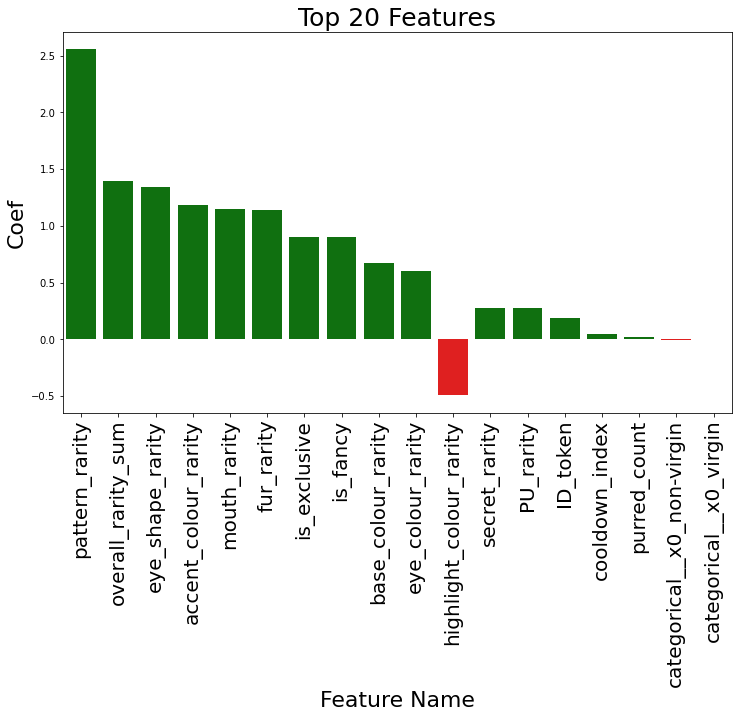

In [1100]:
coefs = pipe.named_steps["regressor"].coef_.flatten()
feature_names = pipe.named_steps["categorical"].get_feature_names()
zipped = zip(feature_names, coefs)
df= pd.DataFrame(zipped, columns=["feature", "value"])
df["abs_value"] = df["value"].apply(lambda x: abs(x))
df["colors"] = df["value"].apply(lambda x: "green" if x > 0 else "red")
df = df.sort_values("abs_value", ascending=False)


import seaborn as sns
fig, ax = plt.subplots(1, 1, figsize=(12, 7))
sns.barplot(x="feature",
            y="value",
            data=df[0:30],  #-30:-1
           palette=df[0:30]["colors"])
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, fontsize=20)
ax.set_title("Top 20 Features", fontsize=25)
ax.set_ylabel("Coef", fontsize=22)
ax.set_xlabel("Feature Name", fontsize=22)

print(len(df))

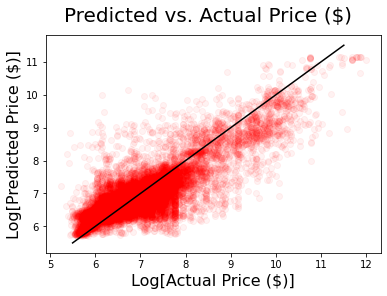

In [1488]:
plt.plot((y_test),(y_pred), 'or', alpha=0.05)
plt.plot(np.linspace(5.5,11.5,5),np.linspace(5.5,11.5,5) , '-k')
#plt.plot(np.linspace(5.5,11.5,5),np.linspace(5.5,11.5,5) , '-k')
plt.suptitle('Predicted vs. Actual Price ($)', fontsize=20)

plt.ylabel('Log[Predicted Price ($)]', fontsize=16)
plt.xlabel('Log[Actual Price ($)]', fontsize=16)
plt.savefig('./graphics/R2.png')

In [1413]:
X_test.columns

Index(['ID_token', 'eye_shape_value', 'highlight_colour_value', 'fur_value',
       'accent_colour_value', 'cooldown_timer_value', 'base_colour_value',
       'eye_colour_value', 'virginity_value', 'pattern_value', 'mouth_value',
       'secret_value', 'purrstige_value', 'eyes_value', 'body_value',
       'colorprimary_value', 'coloreyes_value', 'colortertiary_value',
       'colorsecondary_value', 'PU_rarity', 'secret_rarity', 'mouth_rarity',
       'accent_colour_rarity', 'highlight_colour_rarity', 'base_colour_rarity',
       'eye_shape_rarity', 'eye_colour_rarity', 'pattern_rarity', 'fur_rarity',
       'overall_rarity_sum', 'image_url_png'],
      dtype='object')

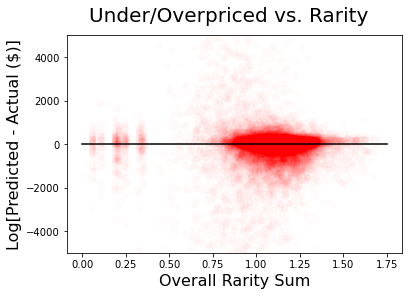

(0.0, 1000000.0)

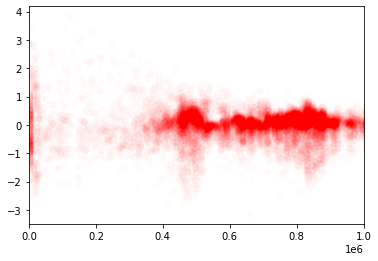

In [1492]:
plt.plot( X_test['overall_rarity_sum'], (np.exp(y_pred) - np.exp(y_test)),'or', alpha=0.01)
plt.plot(np.linspace(0,1.75,5) ,np.linspace(0,0,5), '-k')
plt.ylim([-5000, 5000])
plt.suptitle('Under/Overpriced vs. Rarity', fontsize=20)

plt.ylabel('Log[Predicted - Actual ($)]', fontsize=16)
plt.xlabel('Overall Rarity Sum', fontsize=16)
plt.savefig('./graphics/overallrarityVSprediction.png')

plt.show()

plt.plot( X_test['ID_token'], (y_pred - y_test),'or', alpha=0.01)
plt.plot(np.linspace(0,1.75,5) ,np.linspace(0,0,5), '-k')
#plt.ylim([-2, 2])
plt.xlim([0, 1000000])

In [1005]:
### FEATURE IMPORTANCE RANDOMFORESTMODEL

from sklearn.inspection import permutation_importance

#pipe.named_steps["categorical"].get_feature_names()

start_time = time.time()
result = permutation_importance(
    pipe, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2
)
elapsed_time = time.time() - start_time
print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")


[CV] END regressor__max_depth=43, regressor__min_samples_leaf=1, regressor__min_samples_split=20, regressor__n_estimators=180; total time=   2.2s
[CV] END regressor__max_depth=33, regressor__min_samples_leaf=4, regressor__min_samples_split=10, regressor__n_estimators=29; total time=   0.3s
[CV] END regressor__max_depth=45, regressor__min_samples_leaf=1, regressor__min_samples_split=5, regressor__n_estimators=58; total time=   0.8s
[CV] END regressor__max_depth=56, regressor__min_samples_leaf=2, regressor__min_samples_split=20, regressor__n_estimators=19; total time=   0.2s
[CV] END regressor__max_depth=56, regressor__min_samples_leaf=2, regressor__min_samples_split=20, regressor__n_estimators=19; total time=   0.2s
[CV] END regressor__max_depth=110, regressor__min_samples_leaf=2, regressor__min_samples_split=20, regressor__n_estimators=161; total time=   1.8s
[CV] END regressor__max_depth=12, regressor__min_samples_leaf=4, regressor__min_samples_split=10, regressor__n_estimators=34; to

[CV] END regressor__max_depth=68, regressor__min_samples_leaf=8, regressor__min_samples_split=10, regressor__n_estimators=73; total time=   0.7s
[CV] END regressor__max_depth=97, regressor__min_samples_leaf=5, regressor__min_samples_split=2, regressor__n_estimators=175; total time=   1.9s
[CV] END regressor__max_depth=48, regressor__min_samples_leaf=4, regressor__min_samples_split=2, regressor__n_estimators=161; total time=   1.9s
[CV] END regressor__max_depth=48, regressor__min_samples_leaf=8, regressor__min_samples_split=10, regressor__n_estimators=195; total time=   1.9s
[CV] END regressor__max_depth=76, regressor__min_samples_leaf=2, regressor__min_samples_split=15, regressor__n_estimators=161; total time=   1.8s
[CV] END regressor__max_depth=17, regressor__min_samples_leaf=2, regressor__min_samples_split=10, regressor__n_estimators=58; total time=   0.7s
[CV] END regressor__max_depth=74, regressor__min_samples_leaf=5, regressor__min_samples_split=15, regressor__n_estimators=107; t

Elapsed time to compute the importances: 8.132 seconds


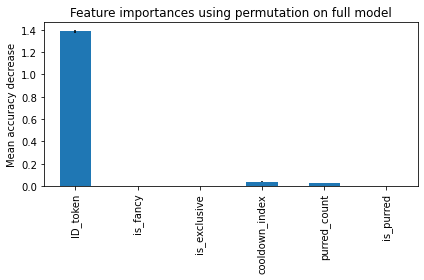

In [1006]:

#feature_names = pipe.named_steps["regressor"].get_feature_names()
#poly.get_feature_names()
feature_names = [f"{i}" for i in Xdata.columns]

forest_importances = pd.Series(result.importances_mean, index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=result.importances_std, ax=ax)
ax.set_title("Feature importances using permutation on full model")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
plt.show()

Elapsed time to compute the importances: 0.025 seconds


/opt/anaconda3/envs/geo-env/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


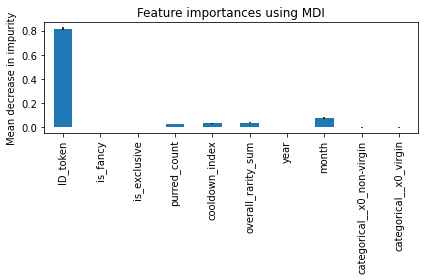

In [1179]:
import time
import numpy as np

start_time = time.time()
importances = pipe['regressor'].feature_importances_
std = np.std([tree.feature_importances_ for tree in pipe['regressor'].estimators_], axis=0)
elapsed_time = time.time() - start_time
feature_names = pipe.named_steps["categorical"].get_feature_names()

print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

import pandas as pd

forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

In [1223]:
all_df.columns

Index(['ID_token', 'eye_shape_count', 'highlight_colour_value', 'fur_value',
       'fur_count', 'accent_colour_value', 'accent_colour_count',
       'base_colour_value', 'eye_colour_value', 'virginity_value',
       'pattern_value', 'pattern_count', 'mouth_value', 'mouth_count',
       'secret_value', 'secret_count', 'purrstige_value', 'eyes_value',
       'body_value', 'colorprimary_value', 'coloreyes_value',
       'colortertiary_value', 'colorsecondary_value', 'fanciness_value',
       'PU_rarity', 'secret_rarity', 'mouth_rarity', 'accent_colour_rarity',
       'highlight_colour_rarity', 'base_colour_rarity', 'eye_shape_rarity',
       'eye_colour_rarity', 'pattern_rarity', 'fur_rarity',
       'overall_rarity_sum', 'image_url_png', 'is_fancy', 'is_exclusive',
       'cooldown_index', 'purred_count', 'year', 'total_price', 'pred_price',
       'price_diff'],
      dtype='object')

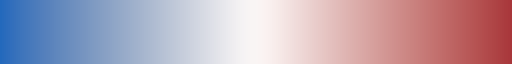

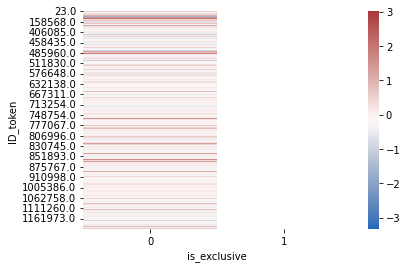

In [1237]:
import seaborn as sns

flights = sns.load_dataset("flights")
flights = all_df.pivot("ID_token", "is_exclusive", "price_diff")
#flights = all_df.pivot("fur_value", "pattern_value", "price_diff")
ax = sns.heatmap(flights, cmap="vlag")
sns.color_palette("vlag", as_cmap="vlag")

(0.0, 10000.0)

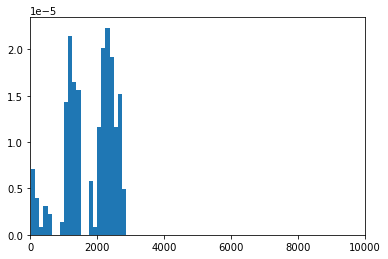

In [1260]:
"""'highlight_colour_value', 'fur_value',
    'accent_colour_value', ,
print(all_df['highlight_colour_value'].unique())
print(all_df['fur_value'].unique())
print(all_df['eye_colour_value'].unique())
print(all_df['pattern_value'].unique())
print(all_df['mouth_value'].unique())
print(all_df['secret_value'].unique())
print(all_df['purrstige_value'].unique())
print(all_df['eyes_value'].unique())
print(all_df['body_value'].unique())"""

hc_price = pd.DataFrame(all_df.groupby(['highlight_colour_value'])['total_price'].mean())
hc_pricediff = pd.DataFrame(all_df.groupby(['highlight_colour_value'])['pred_price'].mean())

fur_price = pd.DataFrame(all_df.groupby(['fur_value'])['total_price'].mean())
fur_pricediff = pd.DataFrame(all_df.groupby(['fur_value'])['pred_price'].mean())

#1234701.0

max(all_df['ID_token'])


ax= plt.hist(all_df['ID_token'], density=True, bins=10000)
plt.xlim([0,10000])
#count, _ = np.histogram(all_df['ID_token'], bins)
#for x,y,num in zip(bins, density, count):
#    if num != 0:
#        plt.text(x, y+0.05, num, fontsize=10, rotation=-90)

#<500
#500<1000


### RESIDUAL



In [867]:
from sklearn.linear_model import RidgeCV

nonlinmodel = RandomForestRegressor(n_estimators = 165, 
                                                 min_samples_split = 20,
                                                 min_samples_leaf = 8,
                                                 max_depth = 25, random_state = 42,
                                                 bootstrap=True,oob_score=False, max_features = 'auto')
#linmodel_residual = RidgeCV(alphas=[1e-3, 1e-2, 1e-1, 1, 20], fit_intercept='True')
linmodel_residual = Ridge(alpha=.0001, fit_intercept='True')
                

linmodel_residual.fit(X_train, y_train)
      

X1, y1 = shuffle(X_train,y_train)
residual =  y1 - linmodel_residual.predict(X1)
        
nonlinmodel.fit(X1,residual)

prednonlin = nonlinmodel.predict(X_test)  
predlin = linmodel_residual.predict(X_test)

ypred_resid = prednonlin + predlin 

#pipe_res.fit(X_train, y_train)
#y_pred2 = pipe_res.predict(X_test)
R2score_alone = r2_score(y_test, predlin, multioutput='variance_weighted')
R2score_resid = r2_score(y_test, ypred_resid, multioutput='variance_weighted')
print(R2score_alone)
print(R2score_resid)

/opt/anaconda3/envs/geo-env/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:156: LinAlgWarning: Ill-conditioned matrix (rcond=3.50782e-20): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


0.38988955700737804
0.6659077392762816


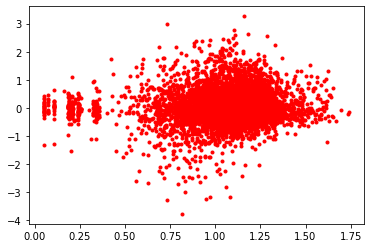

In [1388]:

#plt.plot(X_test['ID_token'], y_pred -.000035*X_test['ID_token']+.69 , '.r', alpha=0.2)
plt.plot(X_test['overall_rarity_sum'], y_test-y_pred , '.r')
#plt.plot(-.000035*y_test.index+.69 , '.b')
#plt.plot(X_test['ID_token'], y_pred , '.m', alpha=0.2)
